In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


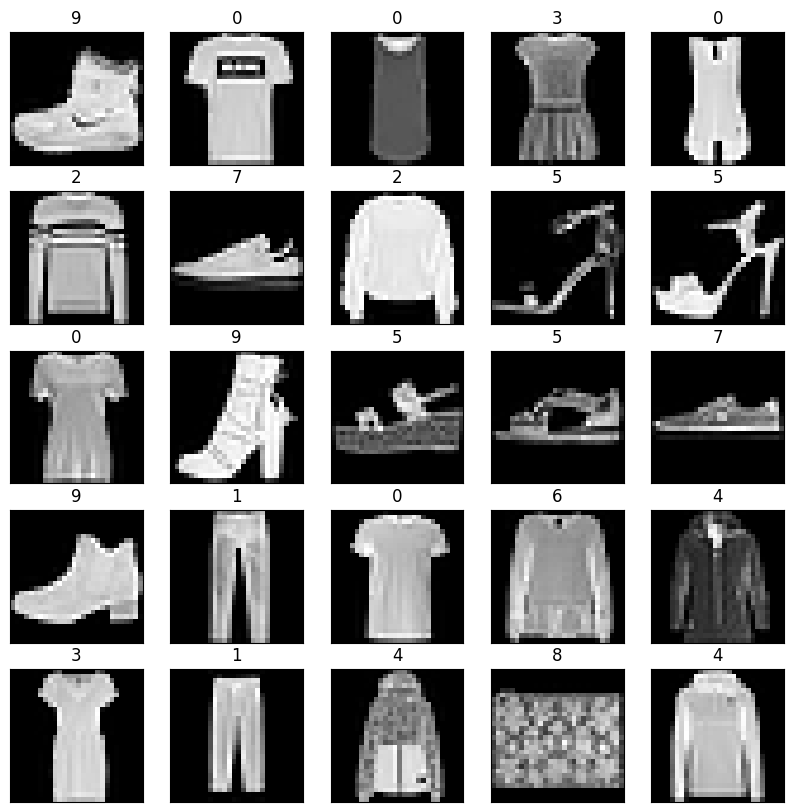

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])

In [7]:
model = keras.Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
x_train = x_train / 255
x_test = x_test / 255
 
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [10]:
print(x_train.shape, x_test.shape)
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8507 - loss: 0.4165 - val_accuracy: 0.8888 - val_loss: 0.3072
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8997 - loss: 0.2718 - val_accuracy: 0.9047 - val_loss: 0.2580
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9172 - loss: 0.2240 - val_accuracy: 0.9128 - val_loss: 0.2385
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9285 - loss: 0.1939 - val_accuracy: 0.8973 - val_loss: 0.2751
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9387 - loss: 0.1668 - val_accuracy: 0.9140 - val_loss: 0.2339


In [13]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9096 - loss: 0.2532


[0.25316041707992554, 0.909600019454956]

In [14]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
 
print(pred.shape)
 
print(pred[:30])
print(y_test[:30])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
(10000,)
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 6 8 0 2 5 7 5 1 2 6 6 9 3]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


In [15]:
mask = pred == y_test
print(mask[:10])
 
x_false = x_test[~mask]
p_false = pred[~mask]
y_false = y_test[~mask]
 
print(x_false.shape)
print(p_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(904, 28, 28, 1)
(904,)


Значение сети: 6, истинное значение: 4


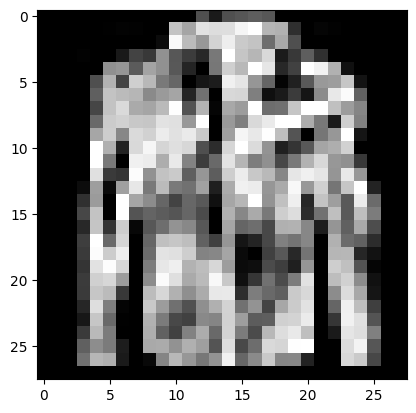

Значение сети: 5, истинное значение: 9


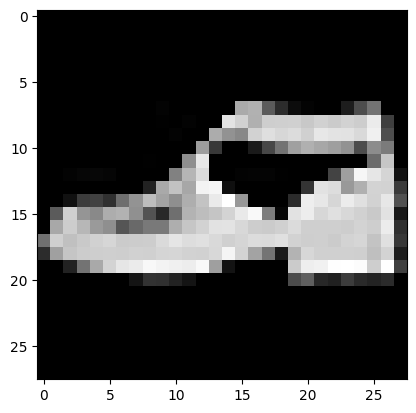

Значение сети: 2, истинное значение: 4


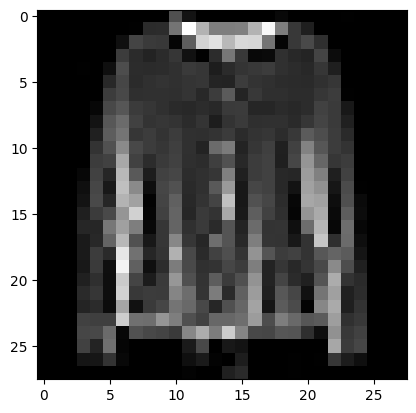

Значение сети: 6, истинное значение: 0


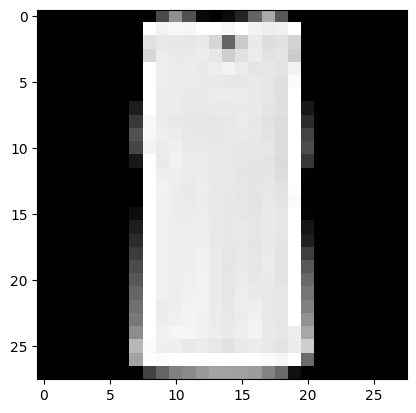

Значение сети: 0, истинное значение: 6


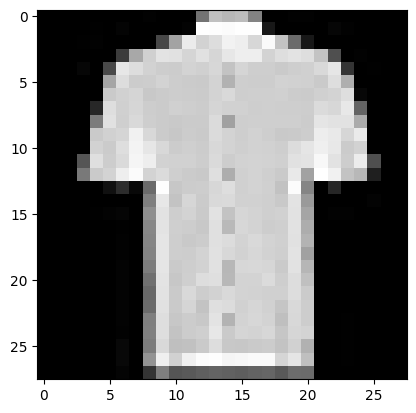

Значение сети: 6, истинное значение: 3


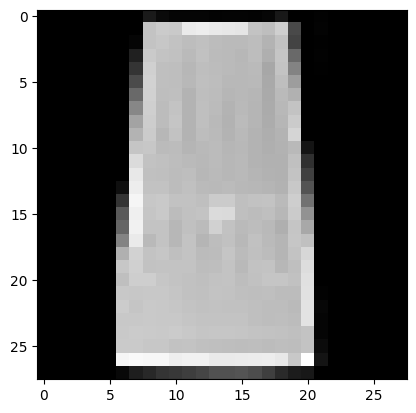

Значение сети: 6, истинное значение: 2


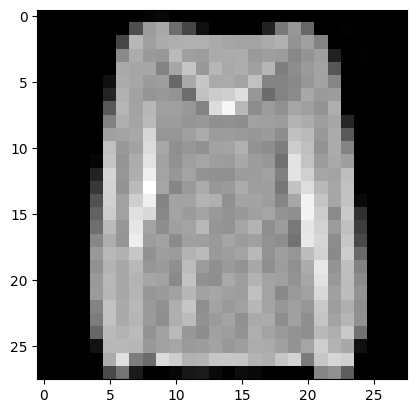

Значение сети: 6, истинное значение: 4


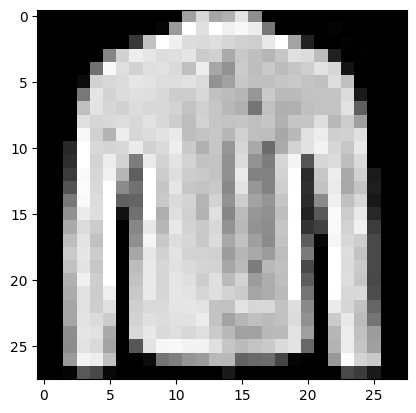

Значение сети: 4, истинное значение: 3


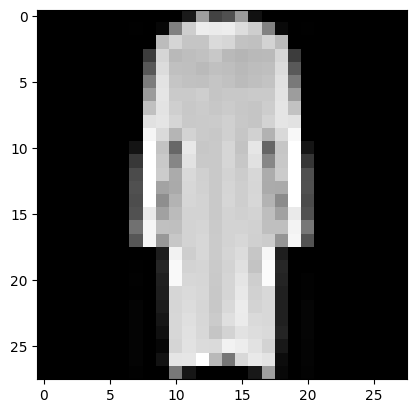

Значение сети: 7, истинное значение: 9


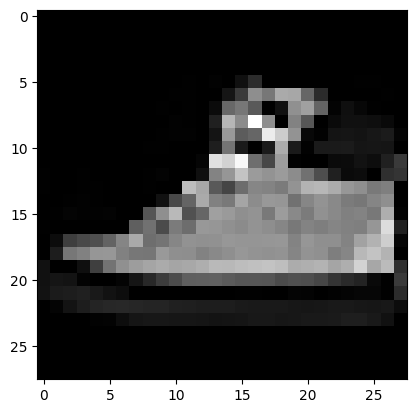

Значение сети: 2, истинное значение: 4


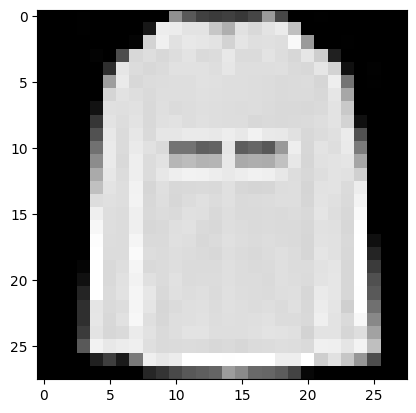

Значение сети: 6, истинное значение: 2


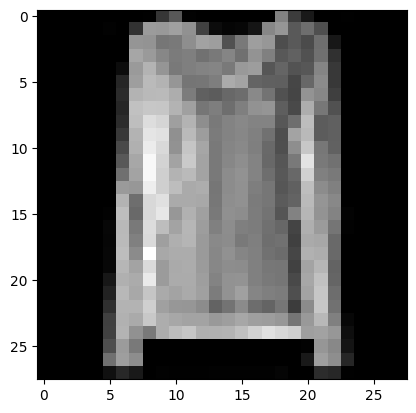

Значение сети: 6, истинное значение: 2


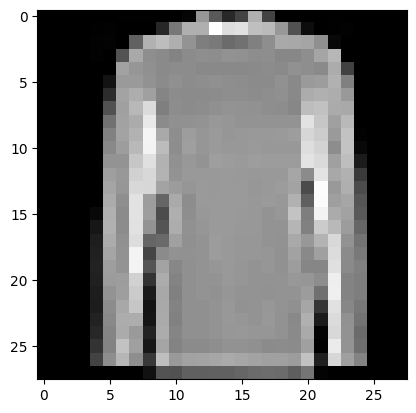

Значение сети: 6, истинное значение: 0


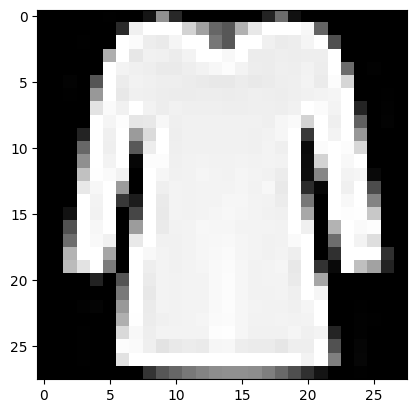

Значение сети: 3, истинное значение: 6


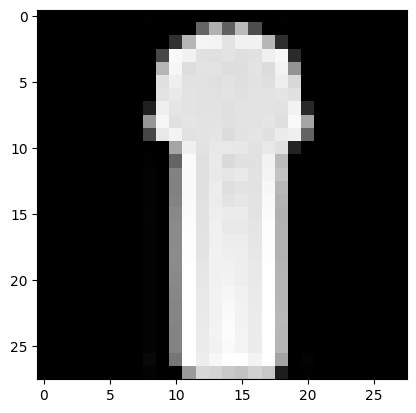

In [16]:
for i in range(15):
    print(f"Значение сети: {p_false[i]}, истинное значение: {y_false[i]}")
    plt.imshow(x_false[i], cmap='gray')
    plt.show()